In [51]:
import scipy
from scipy import spatial as sp

In [126]:
import plotly.figure_factory as ff

In [146]:
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn.preprocessing as prep
from sklearn.datasets import make_blobs
from plotnine import *   
# StandardScaler is a function to normalize the data 
# You may also check MinMaxScaler and MaxAbsScaler 
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

from sklearn.cluster import DBSCAN


from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from sklearn.mixture import GaussianMixture

from sklearn.metrics import silhouette_score

%matplotlib inline
import plotly.figure_factory as ff

In [3]:
# helper function that allows us to display data in 2 dimensions an highlights the clusters
def display_cluster(X,km=[],num_clusters=0):
    color = 'brgcmyk'  #List colors
    alpha = 0.5  #color obaque
    s = 20
    if num_clusters == 0:
        plt.scatter(X[:,0],X[:,1],c = color[0],alpha = alpha,s = s)
    else:
        for i in range(num_clusters):
            plt.scatter(X[km.labels_==i,0],X[km.labels_==i,1],c = color[i],alpha = alpha,s=s)
            plt.scatter(km.cluster_centers_[i][0],km.cluster_centers_[i][1],c = color[i], marker = 'x', s = 100)

In [184]:
#function to perform K-Means Clustering and save silhouette scores and distortions 
def KMeansClustering(data,K):
    n = range(2,K)
    distortions=[]
    silScore=[]
    for i in n:
        km = KMeans(n_clusters=i)
        km=km.fit(data)
        distortions.append(sum(np.min(sp.distance.cdist(data,
            km.cluster_centers_, 'euclidean'),axis=1)) /
            data.shape[0])
        labels = km.labels_
        silScore.append(metrics.silhouette_score(data, labels, metric = 'euclidean'))

    return distortions,silScore

In [183]:
def aggloClustering(data,affinity,linkage):
    agglo = AgglomerativeClustering(n_clusters=5, affinity=affinity, linkage=linkage)
    agglo=agglo.fit(data)
    dendrogram=sch.dendrogram(sch.linkage(data, method='average'))
    plt.figure()

In [216]:
def DBSCAN_Clustering(data,eps_start,eps_stop,eps_step,nsamples_start,nsamples_stop,nsamples_step):
    epsilon=[]
    samples=[]
    silScores=[]
    epsList=np.arange(eps_start,eps_stop,eps_step)
    for i in range(len(epsList)):
        for nsamples in range (nsamples_start,nsamples_stop,nsamples_step):
            epsilon.append(epsList[i])
            samples.append(nsamples)
            db = DBSCAN(eps=epsList[i], min_samples=nsamples)
            db.fit(data)
           # labels = db.labels_
            #silScores.append(metrics.silhouette_score(data, labels, metric = 'euclidean'))
    return epsilon,samples,silScores

# Multi-blob Dataset

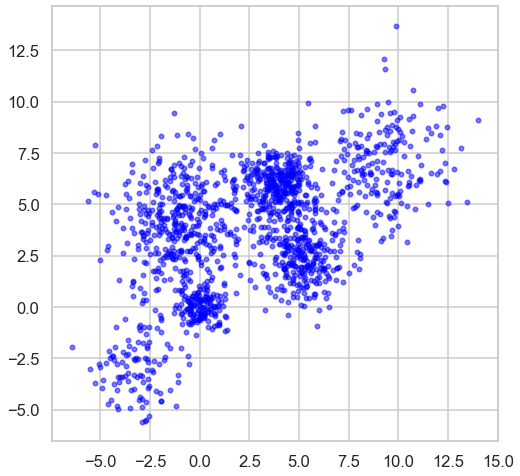

In [156]:
plt.rcParams['figure.figsize'] = [8,8]
sns.set_style("whitegrid")
sns.set_context("talk")

n_bins = 6  
centers = [(-3, -3), (0, 0), (5,2.5),(-1, 4), (4, 6), (9,7)]
Multi_blob_Data, y = make_blobs(n_samples=[100,150, 300, 400,300, 200], n_features=2, cluster_std=[1.3,0.6, 1.2, 1.7,0.9,1.7],
                  centers=centers, shuffle=False, random_state=42)
display_cluster(Multi_blob_Data)

K-Means

In [161]:
K=10
n = range(2,K)
dist_blob,silScore_blob=KMeansClustering(Multi_blob_Data,K)

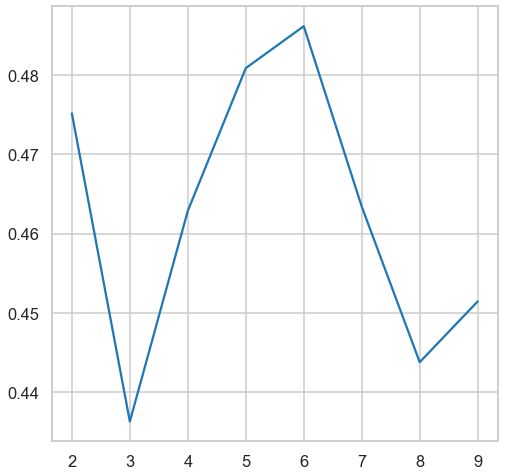

In [164]:
plt.plot(n,silScore_blob)

DBSCAN

In [214]:
epsilon,samples,silScores=DBSCAN_Clustering(Multi_blob_Data,0.1,2,0.1,5,7,1)

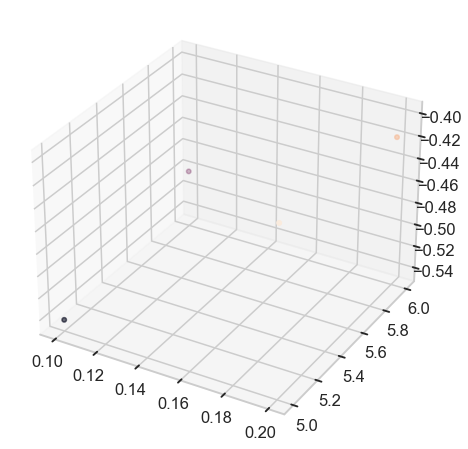

In [208]:
from mpl_toolkits import mplot3d
ax = plt.axes(projection='3d')
ax.scatter3D(epsilon, samples, silScores, c=silScores);

# Iris Dataset

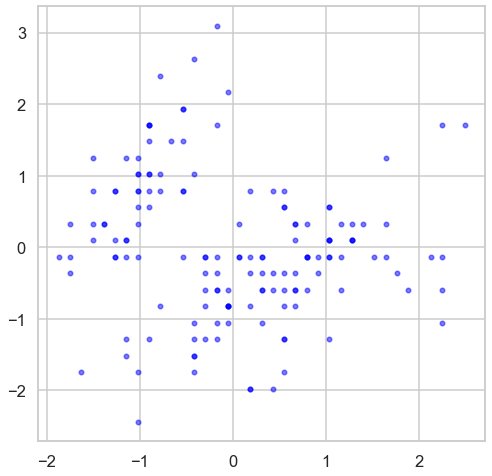

In [181]:
from sklearn.datasets import load_iris
iris_data = load_iris()
iris_data=iris_data.data
iris_data=StandardScaler().fit_transform(iris_data)#to scale data
display_cluster(iris_data)

K-Means

In [176]:
K=10
n = range(2,K)
dist_iris,silScore_iris=KMeansClustering(iris_data,K)

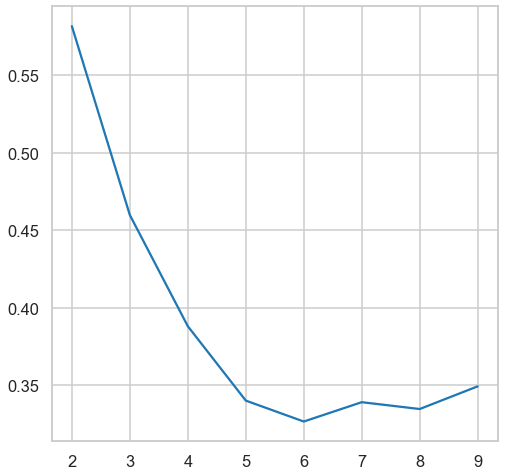

In [182]:
plt.plot(n,silScore_iris)

In [218]:
epsilon,samples,silScores=DBSCAN_Clustering(iris_data,0.1,3,0.1,5,25,1)